In [1]:
import pandas as pd
import numpy as np

In [2]:
cars_test = pd.read_csv("cars_test.csv.zip")
train = pd.read_csv("cars_train.csv.zip")

In [3]:
cars_test.shape

(253073, 23)

In [4]:
train.shape

(469992, 24)

In [24]:
train

,Id,city,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather,price
0,559327,baltimore,2006.0,NaN,Scion tc,excellent,4 cylinders,gas,190000.0,clean,...,blue,39.287000,-76.647600,24510.0,Baltimore City,24.0,MD,Maryland,56.0,3200
1,1429566,carbondale,2018.0,dodge,charger sxt,NaN,NaN,gas,NaN,clean,...,NaN,37.720000,-89.215800,17077.0,Jackson,17.0,IL,Illinois,48.0,30620
2,931606,thumb,1997.0,ford,f 250 2 wheel dr pickup,fair,NaN,gas,NaN,clean,...,white,43.483300,-83.383500,26157.0,Tuscola,26.0,MI,Michigan,45.0,1800
3,1265412,laredo,2003.0,ram,NaN,NaN,8 cylinders,gas,NaN,clean,...,NaN,27.850069,-99.668883,48479.0,Webb,48.0,TX,Texas,67.0,4500
4,1133731,ocala,2000.0,dodge,1500,NaN,NaN,gas,NaN,clean,...,NaN,29.165000,-81.539900,12069.0,Lake,12.0,FL,Florida,65.0,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469987,1505912,olympic,2005.0,ford,f-350 super duty,NaN,NaN,diesel,238047.0,clean,...,black,48.077990,-123.159590,53009.0,Clallam,53.0,WA,Washington,50.0,14990
469988,1436810,peoria,2016.0,hyundai,accent,excellent,other,gas,40516.0,clean,...,NaN,42.278560,-88.031417,17097.0,Lake,17.0,IL,Illinois,48.0,12375
469989,170772,huntsville,2016.0,gmc,sierra 3500hd,excellent,8 cylinders,diesel,151763.0,clean,...,blue,34.683630,-86.577461,1089.0,Madison,1.0,AL,Alabama,61.0,40995
469990,1649643,greenbay,2016.0,hyundai,santa fe sport,excellent,4 cylinders,gas,35028.0,clean,...,white,43.758910,-87.753580,55117.0,Sheboygan,55.0,WI,Wisconsin,45.0,14499


In [6]:
train.isnull().sum()

Id                   0
city                 0
year              1713
manufacturer     37260
make             19078
condition       191021
cylinders       188076
fuel              2844
odometer        153465
title_status       708
transmission      2447
drive           180334
size            306775
type            191640
paint_color     189613
lat                  0
long                 0
county_fips      16009
county_name      16009
state_fips       16009
state_code       16009
state_name           0
weather          16182
price                0
dtype: int64

In [13]:
train.condition.value_counts()

excellent    120909
good         103297
like new      30469
fair          20214
new            2437
salvage        1645
Name: condition, dtype: int64

In [18]:
train.drive.value_counts()

4wd    121087
fwd    101308
rwd     67263
Name: drive, dtype: int64

In [36]:
train.paint_color.value_counts()

white     62659
black     54608
silver    40497
blue      31686
red       31290
grey      27270
green     11810
brown      7307
custom     7151
yellow     3038
orange     1984
purple     1079
Name: paint_color, dtype: int64

In [41]:
grouped_color = train.groupby('paint_color')

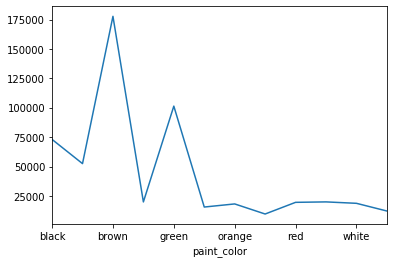

In [52]:
%matplotlib inline

grouped_color.price.mean().plot()

In [53]:
grouped_state = train.groupby('state_name')

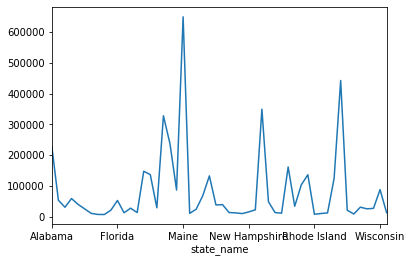

In [56]:
grouped_state.price.mean().plot()

In [69]:
train_filter = train [["Id","year", "condition", "odometer", "type", "manufacturer", "cylinders", "fuel", "transmission", "drive", "paint_color", "state_name", "price"]]

In [73]:
train_filter.isnull().sum()

Id                   0
year              1713
condition       191021
odometer        153465
type            191640
manufacturer     37260
cylinders       188076
fuel              2844
transmission      2447
drive           180334
paint_color     189613
state_name           0
price                0
dtype: int64

In [82]:
df_drop = train_filter[train_filter['type'].notnull()]

In [83]:
df_drop

,Id,year,condition,odometer,type,manufacturer,cylinders,fuel,transmission,drive,paint_color,state_name,price
2,931606,1997.0,fair,NaN,pickup,ford,NaN,gas,automatic,NaN,white,Michigan,1800
5,869261,2005.0,excellent,308000.0,sedan,toyota,6 cylinders,gas,automatic,fwd,red,Michigan,2800
6,229951,2018.0,like new,38.0,truck,ford,6 cylinders,gas,automatic,rwd,grey,FAILED,34899
7,1299110,1999.0,excellent,NaN,other,lincoln,6 cylinders,gas,automatic,NaN,white,Texas,1200
8,1203620,2006.0,NaN,208270.0,truck,ram,6 cylinders,diesel,automatic,4wd,red,Montana,15995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469987,1505912,2005.0,NaN,238047.0,truck,ford,NaN,diesel,automatic,4wd,black,Washington,14990
469988,1436810,2016.0,excellent,40516.0,hatchback,hyundai,other,gas,automatic,fwd,NaN,Illinois,12375
469989,170772,2016.0,excellent,151763.0,truck,gmc,8 cylinders,diesel,automatic,4wd,blue,Alabama,40995
469990,1649643,2016.0,excellent,35028.0,SUV,hyundai,4 cylinders,gas,automatic,fwd,white,Wisconsin,14499


In [84]:
df_drop.isnull().sum()

Id                  0
year             1216
condition       65605
odometer        44260
type                0
manufacturer    16468
cylinders       54549
fuel             1695
transmission     1950
drive           38321
paint_color     40818
state_name          0
price               0
dtype: int64

In [101]:
mean_odometer= df_drop.odometer.mean()

In [102]:
df_drop['odometer'] = df_drop['odometer'].fillna(mean_odometer)

In [105]:
df_drop['condition'] = df_drop['condition'].fillna("otro")

In [106]:
df_drop.isnull().sum()

Id                  0
year             1216
condition           0
odometer            0
type                0
manufacturer    16468
cylinders       54549
fuel             1695
transmission     1950
drive           38321
paint_color     40818
state_name          0
price               0
dtype: int64